# import labreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# loding the Data set

In [2]:
df=pd.read_csv("E:\data\health_care_cost.csv")
df

,region,smoker,sex,age,children,bmi,expenses
0,southwest,yes,female,19,0,27.9,16884.92
1,southeast,no,male,18,1,33.8,1725.55
2,southeast,no,male,28,3,33.0,4449.46
3,northwest,no,male,33,0,22.7,21984.47
4,northwest,no,male,32,0,28.9,3866.86
...,...,...,...,...,...,...,...
1333,northwest,no,male,50,3,31.0,10600.55
1334,northeast,no,female,18,0,31.9,2205.98
1335,southeast,no,female,18,0,36.9,1629.83
1336,southwest,no,female,21,0,25.8,2007.95


# Data Inspection and Summary

In [3]:
print(df.columns)

Index(['region', 'smoker', 'sex', 'age', 'children', 'bmi', 'expenses'], dtype='object')


In [4]:
# Display the first few rows
print(df.head())
print("::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::")
# Check the shape of the DataFrame
print(df.shape)
print("::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::")
# Check the data types of each column
print(df.dtypes)

      region smoker     sex  age  children   bmi  expenses
0  southwest    yes  female   19         0  27.9  16884.92
1  southeast     no    male   18         1  33.8   1725.55
2  southeast     no    male   28         3  33.0   4449.46
3  northwest     no    male   33         0  22.7  21984.47
4  northwest     no    male   32         0  28.9   3866.86
::::::::::::::::::::::::::::
::::::::::::::::::::::::::::
::::::::::::::::::::::::::::
(1338, 7)
::::::::::::::::::::::::::::
::::::::::::::::::::::::::::
::::::::::::::::::::::::::::
region       object
smoker       object
sex          object
age           int64
children      int64
bmi         float64
expenses    float64
dtype: object


In [5]:
# Check for missing values
print(df.isnull().sum())

region      0
smoker      0
sex         0
age         0
children    0
bmi         0
expenses    0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   smoker    1338 non-null   object 
 2   sex       1338 non-null   object 
 3   age       1338 non-null   int64  
 4   children  1338 non-null   int64  
 5   bmi       1338 non-null   float64
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numeric_cols = ['age', 'children', 'bmi', 'expenses']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Handle Outliers

In [8]:
from scipy import stats

# Assuming df is your DataFrame
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for Z-scores (typically 3 is used)
threshold = 3

# Create a boolean mask for rows to keep
mask = (z_scores < threshold).all(axis=1)

# Apply the mask to the DataFrame
df_cleaned = df[mask]


In [9]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define a condition to filter out outliers
    condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Apply the condition to filter out outliers
    df_cleaned = df[condition]
    
    return df_cleaned

# Apply the function to your DataFrame
df_cleaned = remove_outliers_iqr(df.select_dtypes(include=[np.number]))


# Separate features and target

In [10]:
# Separate features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Define preprocessing for numeric features (age, bmi, children)
numeric_features = ['age', 'bmi', 'children']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Scale numeric features
])

# Define preprocessing for categorical features (region, smoker, sex)
categorical_features = ['region', 'smoker', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

In [11]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline that includes preprocessing and the model
lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

# Train the model
lin_reg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg_pipeline.predict(X_test)

# Evaluate the model
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Linear Regression
MSE: 0.23049307647353967
R^2 Score: 0.7696351080608883


# LR

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the column names are correctly specified
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['region', 'smoker', 'sex']

# Check for correct column names in DataFrame
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)
print("Columns in DataFrame:", df.columns)

# Define the preprocessing steps again
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
lin_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

# Train the model
lin_reg_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg_pipeline.predict(X_test)

# Evaluate the model
print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Numeric Features: ['age', 'bmi', 'children']
Categorical Features: ['region', 'smoker', 'sex']
Columns in DataFrame: Index(['region', 'smoker', 'sex', 'age', 'children', 'bmi', 'expenses'], dtype='object')
Linear Regression
MSE: 0.23049307647353967
R^2 Score: 0.7696351080608883


# Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Ridge(alpha=1.0))])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("\nRidge Regression")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression
MSE: 0.23073372071569012
R^2 Score: 0.7693945976486586


# Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Lasso(alpha=0.1))])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

print("\nLasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R^2 Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression
MSE: 0.32051856769777376
R^2 Score: 0.6796596828770568


# Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', DecisionTreeRegressor(random_state=42))])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

print("\nDecision Tree Regression")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R^2 Score:", r2_score(y_test, y_pred_tree))



Decision Tree Regression
MSE: 0.2469967623715298
R^2 Score: 0.7531406003877956


# Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

forest_pipeline.fit(X_train, y_train)
y_pred_forest = forest_pipeline.predict(X_test)

print("\nRandom Forest Regression")
print("MSE:", mean_squared_error(y_test, y_pred_forest))
print("R^2 Score:", r2_score(y_test, y_pred_forest))



Random Forest Regression
MSE: 0.14726085775910136
R^2 Score: 0.852821038689938


# Support Vector Regression (SVR)

In [18]:
from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))])

svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

print("\nSupport Vector Regression (SVR)")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R^2 Score:", r2_score(y_test, y_pred_svr))



Support Vector Regression (SVR)
MSE: 0.14344994530528102
R^2 Score: 0.8566298317740743


# Store model results

In [19]:
# Store model results
results = {
    'Linear Regression': {'MSE': mean_squared_error(y_test, y_pred), 'R^2': r2_score(y_test, y_pred)},
    'Ridge Regression': {'MSE': mean_squared_error(y_test, y_pred_ridge), 'R^2': r2_score(y_test, y_pred_ridge)},
    'Lasso Regression': {'MSE': mean_squared_error(y_test, y_pred_lasso), 'R^2': r2_score(y_test, y_pred_lasso)},
    'Decision Tree Regression': {'MSE': mean_squared_error(y_test, y_pred_tree), 'R^2': r2_score(y_test, y_pred_tree)},
    'Random Forest Regression': {'MSE': mean_squared_error(y_test, y_pred_forest), 'R^2': r2_score(y_test, y_pred_forest)},
    'SVR': {'MSE': mean_squared_error(y_test, y_pred_svr), 'R^2': r2_score(y_test, y_pred_svr)}
}

# Extract model names, MSE, and R² values
models = list(results.keys())
mse_values = [results[model]['MSE'] for model in models]
r2_values = [results[model]['R^2'] for model in models]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars



# Find the best model based on MSE

Best Model based on MSE: SVR with MSE: 0.14344994530528102
Best Model based on R² Score: SVR with R² Score: 0.8566298317740743


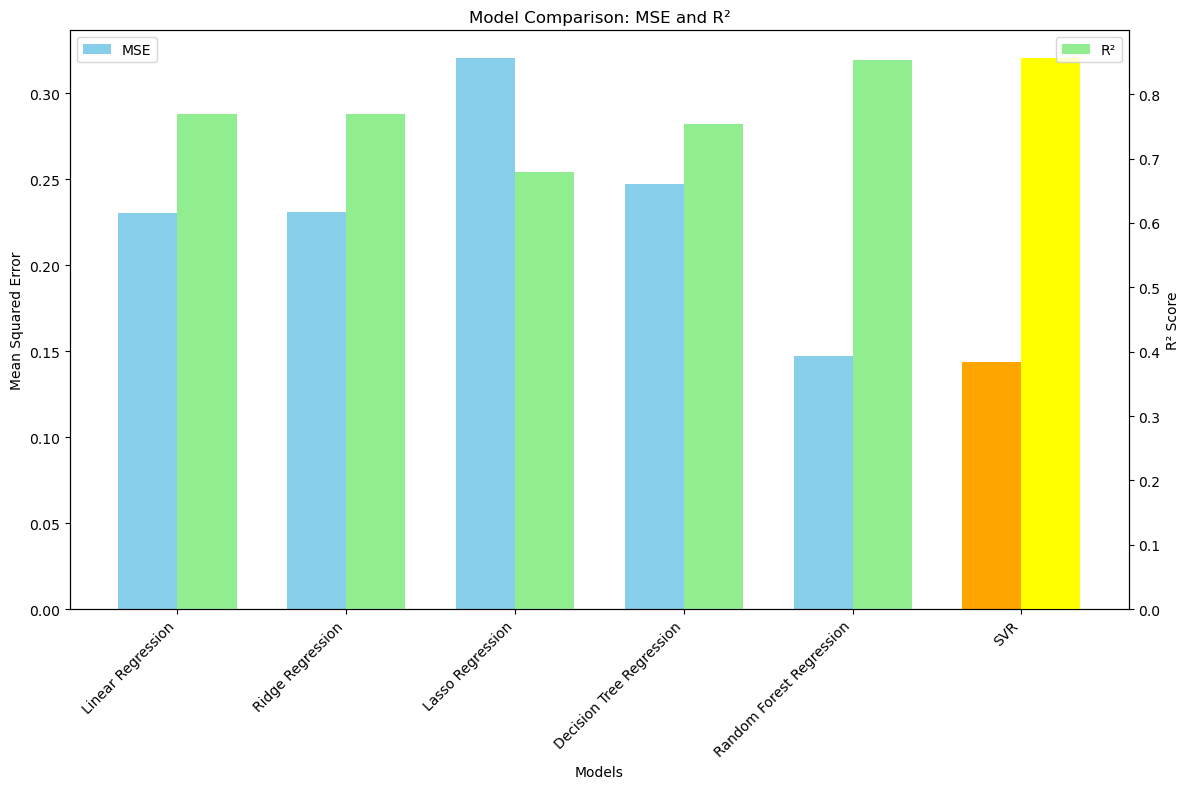

In [20]:
# Find the best model based on MSE
best_mse_model = min(results, key=lambda x: results[x]['MSE'])
best_mse_value = results[best_mse_model]['MSE']

# Find the best model based on R² Score
best_r2_model = max(results, key=lambda x: results[x]['R^2'])
best_r2_value = results[best_r2_model]['R^2']

print(f"Best Model based on MSE: {best_mse_model} with MSE: {best_mse_value}")
print(f"Best Model based on R² Score: {best_r2_model} with R² Score: {best_r2_value}")

# Highlight the best models in the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot MSE
ax1.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Model Comparison: MSE and R²')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Highlight the best MSE model
best_mse_index = models.index(best_mse_model)
ax1.bar(best_mse_index - width/2, mse_values[best_mse_index], width, color='orange', label='Best MSE Model')

# Plot R²
ax2 = ax1.twinx()
ax2.bar(x + width/2, r2_values, width, label='R²', color='lightgreen')
ax2.set_ylabel('R² Score')
ax2.legend(loc='upper right')

# Highlight the best R² model
best_r2_index = models.index(best_r2_model)
ax2.bar(best_r2_index + width/2, r2_values[best_r2_index], width, color='yellow', label='Best R² Model')

fig.tight_layout()
plt.show()

In [21]:
from joblib import load

filename = 'C:/Users/ustb/ml/best_svr_model.joblib'

# Load the model from the joblib file
try:
    loaded_svr_model = load(filename)
    print("SVR model loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: [Errno 2] No such file or directory: 'C:/Users/ustb/ml/best_svr_model.joblib'


In [22]:
from joblib import dump

filename = 'C:/Users/ustb/ml/best_svr_model.joblib'

# Save the SVR model using joblib
try:
    dump(svr_pipeline, filename)
    print(f"Best SVR model saved to {filename}")
except Exception as e:
    print(f"An error occurred while saving: {e}")


Best SVR model saved to C:/Users/ustb/ml/best_svr_model.joblib


In [23]:
import pickle

# Save the SVR model with pickle
with open('C:/Users/ustb/ml/best_svr_model.pkl', 'wb') as file:
    pickle.dump(svr_pipeline, file)

# Load the SVR model with pickle
with open('C:/Users/ustb/ml/best_svr_model.pkl', 'rb') as file:
    loaded_svr_model = pickle.load(file)
